In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import io
import requests
from datetime import date


In [7]:
url1="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-21.xlsx"
df_all=pd.read_excel(url1)
df_all['DateRep'] = df_all['DateRep'].apply(lambda x: x.date())
df_all= df_all.sort_values('DateRep')


In [60]:
def graph(country,date1): #same x axies
    #country = 'Japan'
    
    #Creates the new df forselected country
    df = df_all[df_all['Countries and territories'].str.match(country)]
    df= df.sort_values('DateRep').reset_index()
    
    #Select data after selected date
    mask = df['DateRep'] > pd.to_datetime(date1)
    df = df.loc[mask]

    df['New Cases Trendline'] = df['Cases'].rolling(3).mean()
    df['New Deaths Trendline'] = df['Deaths'].rolling(3).mean()
    df=df.reset_index()

    width = 0.35 
    fig =plt.figure(figsize=(11,7))

    ax = fig.add_subplot(111) 
    ax2 = ax.twinx()
    bar1 = df['Cases'].plot(kind='bar', color='blue',alpha=0.3,
                                ax=ax, width=width, 
                                position=0, label='New Cases',x='index',fontsize =14)

    bar2 = df['Deaths'].plot(kind='bar', color='red',alpha=0.3, 
                                 ax=ax2, width=width, 
                                 position=1, label='New Deaths', x='index',fontsize =14)

    trend1 = df['New Cases Trendline'].plot(kind='line',lw=3, color='blue',ax=ax, 
                                            label='3 Days Moving Average of Daily New Cases',x='index')
    trend2 = df['New Deaths Trendline'].plot(kind='line',lw=3, color='red',ax=ax2, 
                                             label='3 Days Moving Average of Daily New Deaths',x='index')

    plt.title(country, fontsize=22,loc='left')
    ax.set_ylabel('Daily New Cases',fontsize =14)
    ax2.set_ylabel('Daily New Deaths (Scaled to 10% of New Cases)',fontsize =14)

    ax.set_xticks(np.arange(0,len(df.DateRep),2))
    dates= df.DateRep.iloc[::2]
    ax.set_xticklabels(dates,rotation=45)

    #Set y limits
    y1_max = df.Cases.max()*1.2
    y2_max = y1_max*0.1 #10% oc max cases
    
    try:
        ax2.set_ylim([0,y2_max])
    except:
        y2_max=10

    ax.set_ylim([0,y1_max])
    ax2.set_ylim([0,y2_max])

    ax.grid(axis='y',linestyle='-', linewidth=2, alpha=0.4)
        
    ax.legend(loc=2,fontsize =12)
    ax2.legend(loc=0,fontsize =12)

    fig.tight_layout()
    fig.savefig(country)

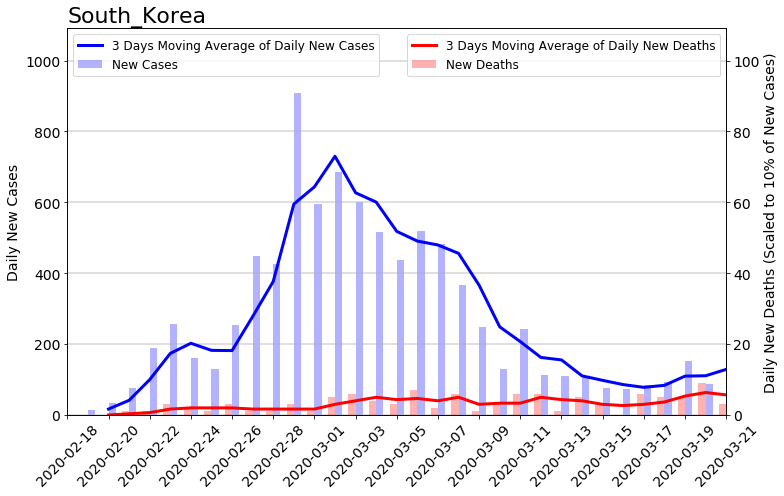

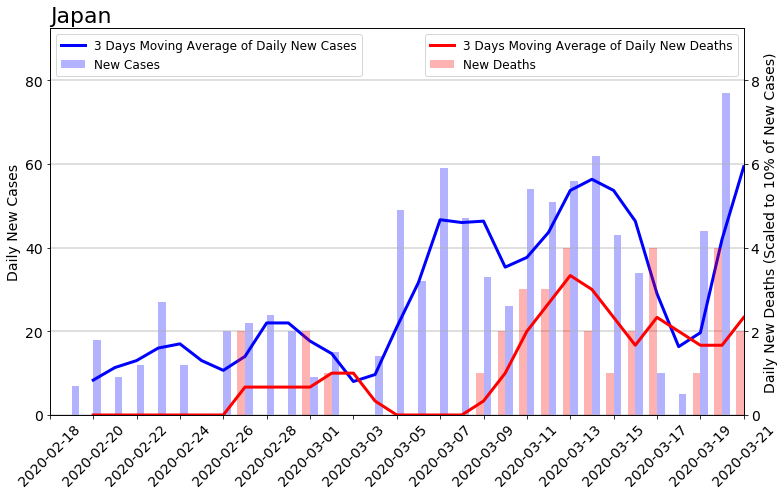

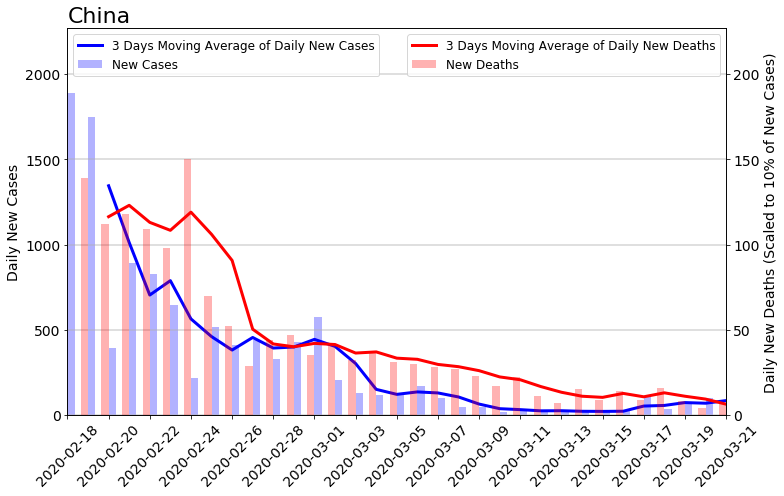

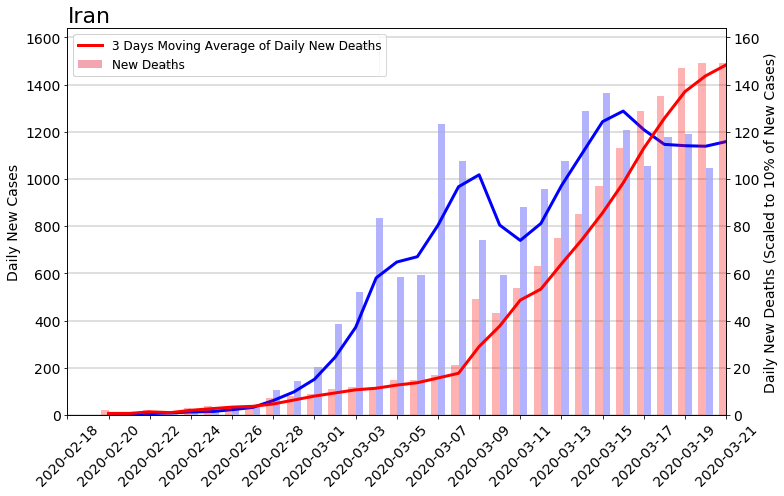

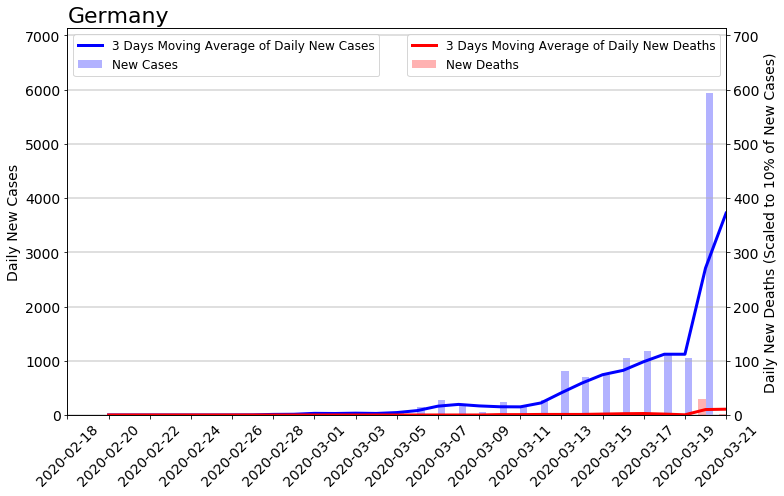

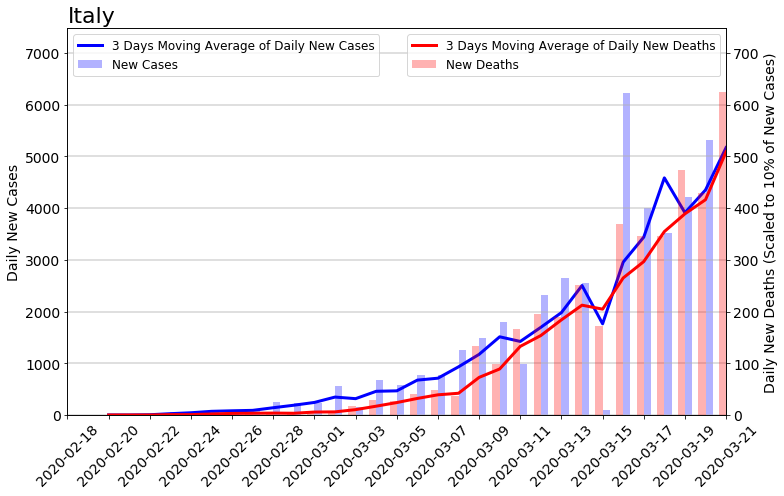

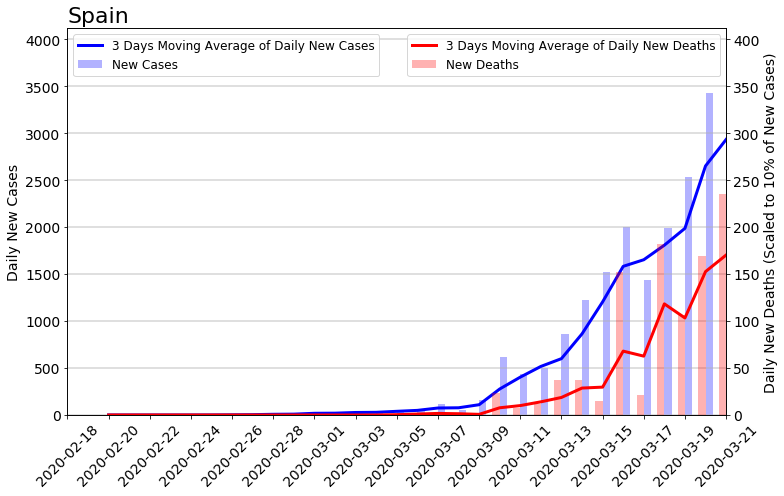

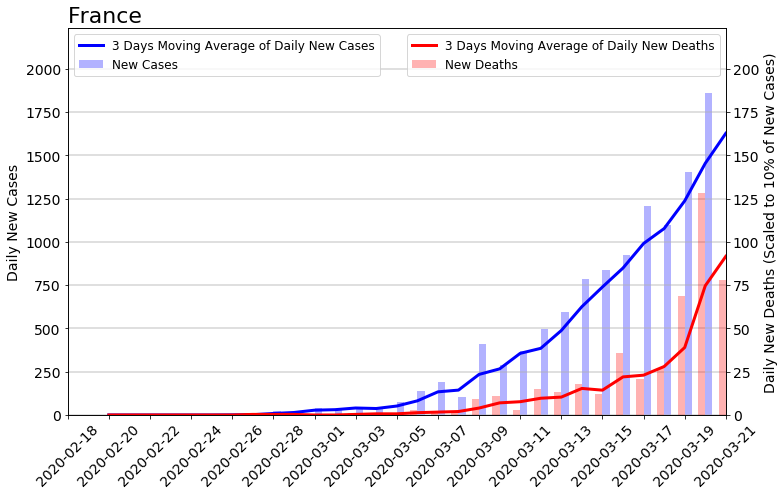

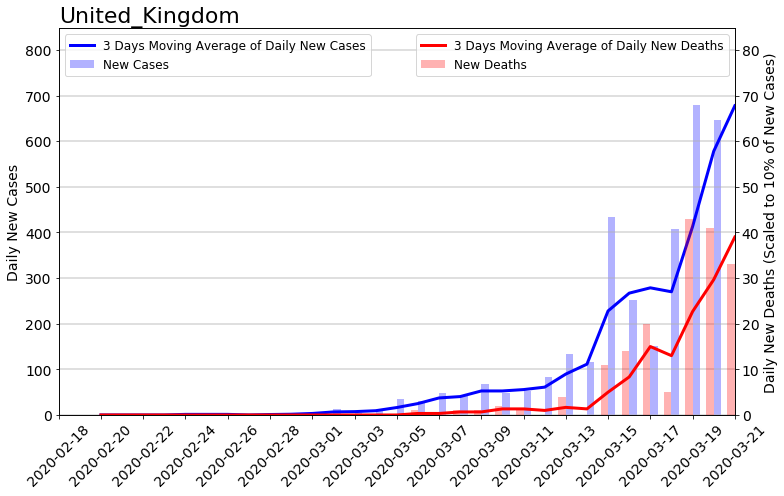

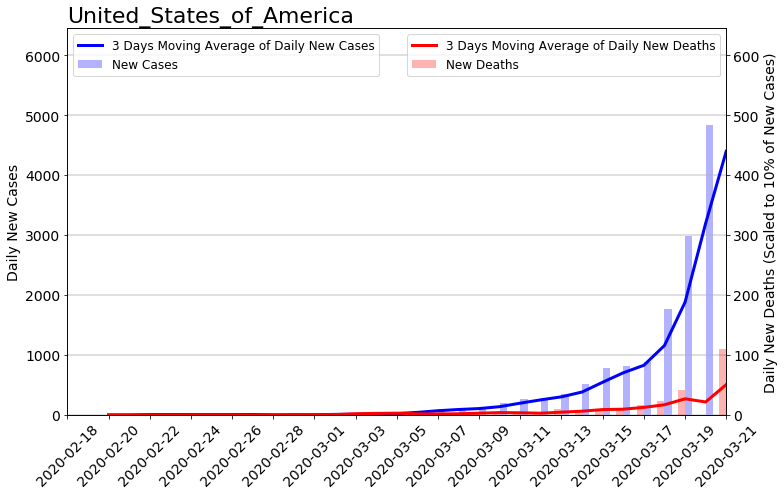

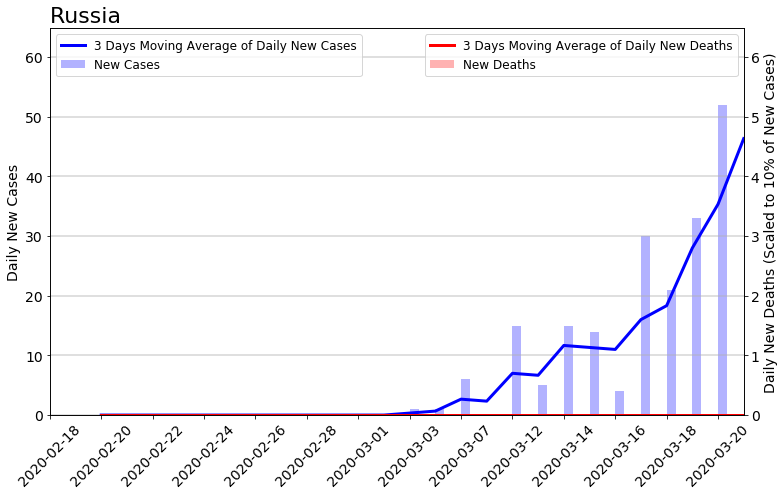

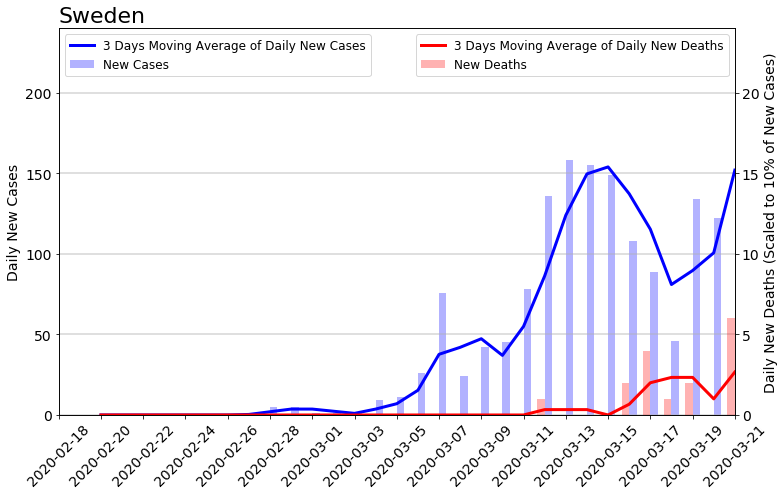

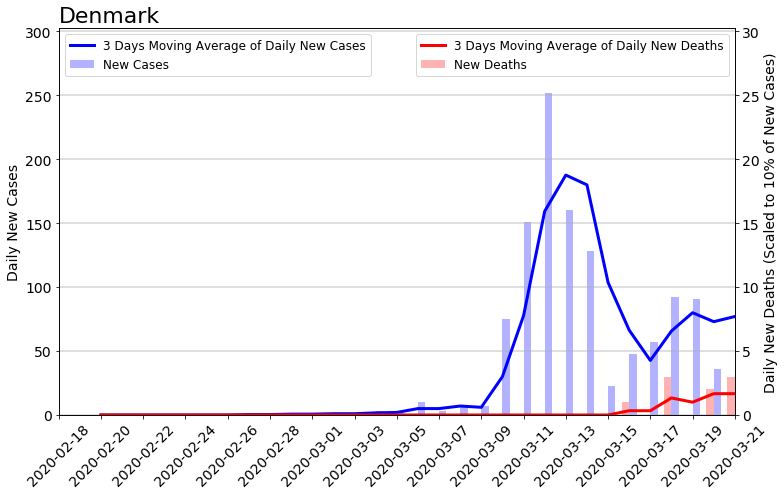

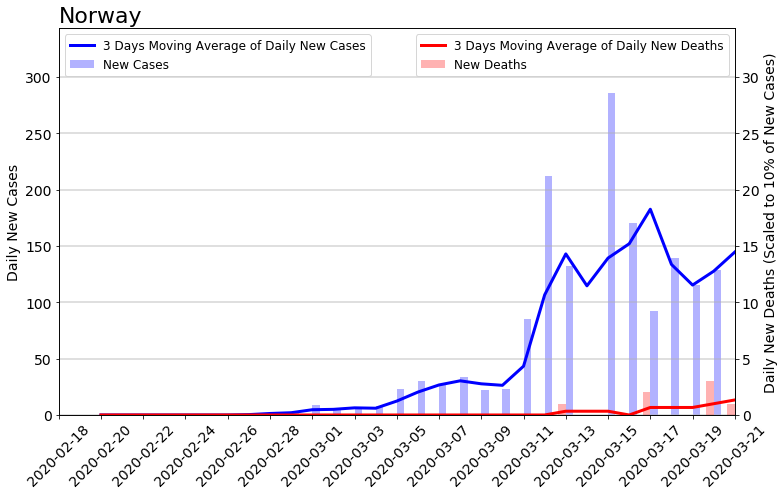

In [61]:
check = ['South_Korea', 'Japan', 'China','Iran', 
         'Germany', 'Italy', 'Spain','France',
         'United_Kingdom', 'United_States_of_America', 
         'Russia',
         'Sweden','Denmark','Norway']

start_date= '2020-02-17'

for i in check:
    graph(i,start_date)